In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress
import requests
import gmaps
import scipy.stats as st
from Config import g_key

In [2]:
#reading in the alcohol data

raw_alcohol_df =pd.read_csv('Alcohol_Sales.csv')

In [3]:
raw_alcohol_df.head()

,County,2017-2018 Year Total ($),2018-2019 Year Total ($),2019-2020 Year Total ($)
0,Adams,5974649.0,6087119.0,5474672.0
1,Allegheny,287446445.0,297562217.0,282457996.0
2,Armstrong,4119789.0,4100004.0,3946644.0
3,Beaver,20662151.0,21929547.0,21044165.0
4,Bedford,3794119.0,3777616.0,3624763.0


In [4]:
#deleting columns for years not being used
del raw_alcohol_df['2017-2018 Year Total ($)']

In [5]:
del raw_alcohol_df['2018-2019 Year Total ($)']

In [6]:
raw_alcohol_df

,County,2019-2020 Year Total ($)
0,Adams,5474672.0
1,Allegheny,282457996.0
2,Armstrong,3946644.0
3,Beaver,21044165.0
4,Bedford,3624763.0
...,...,...
62,Washington,26798762.0
63,Wayne,12246352.0
64,Westmoreland,60414024.0
65,Wyoming,3026001.0


In [7]:
alcohol_df =raw_alcohol_df.rename(columns ={'2019-2020 Year Total ($)':'Yearly Alcohol Sales'})

In [8]:
alcohol_df

,County,Yearly Alcohol Sales
0,Adams,5474672.0
1,Allegheny,282457996.0
2,Armstrong,3946644.0
3,Beaver,21044165.0
4,Bedford,3624763.0
...,...,...
62,Washington,26798762.0
63,Wayne,12246352.0
64,Westmoreland,60414024.0
65,Wyoming,3026001.0


In [9]:
#reading in the covid data


covid_df =pd.read_csv('Covidmonthly_data')

In [10]:
covid_df

,Unnamed: 0,County,Date,Monthly Cases,Longitude,Latitude
0,0,Adams,2020-03,13.0,-79.762866,41.403413
1,1,Adams,2020-04,130.0,-76.223324,40.707512
2,2,Adams,2020-05,113.0,-76.779606,40.419746
3,3,Adams,2020-06,93.0,-76.779606,40.419746
4,4,Adams,2020-07,132.0,-76.779606,40.419746
...,...,...,...,...,...,...
1151,1151,York,2021-03,3823.0,-79.762866,41.403413
1152,1152,York,2021-04,4675.0,-78.491165,40.007375
1153,1153,York,2021-05,2123.0,-79.762866,41.403413
1154,1154,York,2021-06,429.0,-75.340836,41.060918


In [11]:
covid_df.drop(covid_df.columns[0], axis=1, inplace=True)

In [12]:
covid_df

,County,Date,Monthly Cases,Longitude,Latitude
0,Adams,2020-03,13.0,-79.762866,41.403413
1,Adams,2020-04,130.0,-76.223324,40.707512
2,Adams,2020-05,113.0,-76.779606,40.419746
3,Adams,2020-06,93.0,-76.779606,40.419746
4,Adams,2020-07,132.0,-76.779606,40.419746
...,...,...,...,...,...
1151,York,2021-03,3823.0,-79.762866,41.403413
1152,York,2021-04,4675.0,-78.491165,40.007375
1153,York,2021-05,2123.0,-79.762866,41.403413
1154,York,2021-06,429.0,-75.340836,41.060918


In [13]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County         1156 non-null   object 
 1   Date           1156 non-null   object 
 2   Monthly Cases  1156 non-null   float64
 3   Longitude      1156 non-null   float64
 4   Latitude       1156 non-null   float64
dtypes: float64(3), object(2)
memory usage: 45.3+ KB


In [14]:
#converting date column to datetime type for easy filtering later for only the dates we need which is march to July to match the sales data we have
covid_df["Date"] = pd.to_datetime(covid_df["Date"])

In [15]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   County         1156 non-null   object        
 1   Date           1156 non-null   datetime64[ns]
 2   Monthly Cases  1156 non-null   float64       
 3   Longitude      1156 non-null   float64       
 4   Latitude       1156 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 45.3+ KB


In [16]:
timefilteredDF = covid_df[covid_df.Date < '2020-08']

In [17]:
timefilteredDF.head(50)

,County,Date,Monthly Cases,Longitude,Latitude
0,Adams,2020-03-01,13.0,-79.762866,41.403413
1,Adams,2020-04-01,130.0,-76.223324,40.707512
2,Adams,2020-05-01,113.0,-76.779606,40.419746
3,Adams,2020-06-01,93.0,-76.779606,40.419746
4,Adams,2020-07-01,132.0,-76.779606,40.419746
17,Allegheny,2020-03-01,361.0,-76.223324,40.707512
18,Allegheny,2020-04-01,972.0,-75.340836,41.060918
19,Allegheny,2020-05-01,596.0,-77.259074,40.404153
20,Allegheny,2020-06-01,968.0,-77.723988,39.927862
21,Allegheny,2020-07-01,5308.0,-76.779606,40.419746


In [18]:
#grouping by county and summing to get yearly covid cases 
Yearly_covid_df = timefilteredDF.groupby(['County']).sum()

In [19]:
Yearly_covid_df

,Monthly Cases,Longitude,Latitude
County,,,
Adams,481.0,-386.325006,203.370164
Allegheny,8205.0,-383.326828,202.520192
Armstrong,188.0,-384.858223,199.582376
Beaver,1229.0,-381.826163,203.299842
Bedford,131.0,-388.425779,204.707236
...,...,...,...
Washington,755.0,-391.474480,204.546563
Wayne,158.0,-392.259135,203.774513
Westmoreland,1449.0,-385.983425,204.507217


In [20]:
# setting index back to numeric values instead of by County
Yearly_covid_df.reset_index(inplace=True)

In [21]:
Yearly_covid_df.head(50)

,County,Monthly Cases,Longitude,Latitude
0,Adams,481.0,-386.325006,203.370164
1,Allegheny,8205.0,-383.326828,202.520192
2,Armstrong,188.0,-384.858223,199.582376
3,Beaver,1229.0,-381.826163,203.299842
4,Bedford,131.0,-388.425779,204.707236
5,Berks,5170.0,-396.310536,206.017804
6,Blair,219.0,-385.259619,202.324125
7,Bradford,101.0,-391.297198,205.285904
8,Bucks,6935.0,-387.951578,202.014469
9,Butler,610.0,-388.194878,204.378612


In [22]:
#renaming the month column to yearly
clean_yearly_covid_df = Yearly_covid_df.rename(columns={'Monthly Cases': 'Yearly Covid Cases'})

In [23]:
clean_yearly_covid_df

,County,Yearly Covid Cases,Longitude,Latitude
0,Adams,481.0,-386.325006,203.370164
1,Allegheny,8205.0,-383.326828,202.520192
2,Armstrong,188.0,-384.858223,199.582376
3,Beaver,1229.0,-381.826163,203.299842
4,Bedford,131.0,-388.425779,204.707236
...,...,...,...,...
63,Washington,755.0,-391.474480,204.546563
64,Wayne,158.0,-392.259135,203.774513
65,Westmoreland,1449.0,-385.983425,204.507217
66,Wyoming,60.0,-387.596942,205.277002


In [24]:
#deleting the latitude and longitude columns that been summed as they are nolonger accurate they will be added back later
del clean_yearly_covid_df['Longitude']

In [25]:
del clean_yearly_covid_df['Latitude']

In [26]:
clean_yearly_covid_df

,County,Yearly Covid Cases
0,Adams,481.0
1,Allegheny,8205.0
2,Armstrong,188.0
3,Beaver,1229.0
4,Bedford,131.0
...,...,...
63,Washington,755.0
64,Wayne,158.0
65,Westmoreland,1449.0
66,Wyoming,60.0


In [27]:
#there are 68 rows but only 67 counties, trying to figure out what is the extra row
clean_yearly_covid_df['County'].unique()

array(['Adams', 'Allegheny', 'Armstrong', 'Beaver', 'Bedford', 'Berks',
       'Blair', 'Bradford', 'Bucks', 'Butler', 'Cambria', 'Cameron',
       'Carbon', 'Centre', 'Chester', 'Clarion', 'Clearfield', 'Clinton',
       'Columbia', 'Crawford', 'Cumberland', 'Dauphin', 'Delaware', 'Elk',
       'Erie', 'Fayette', 'Forest', 'Franklin', 'Fulton', 'Greene',
       'Huntingdon', 'Indiana', 'Jefferson', 'Juniata', 'Lackawanna',
       'Lancaster', 'Lawrence', 'Lebanon', 'Lehigh', 'Luzerne',
       'Lycoming', 'McKean', 'Mercer', 'Mifflin', 'Monroe', 'Montgomery',
       'Montour', 'Northampton', 'Northumberland', 'Pennsylvania',
       'Perry', 'Philadelphia', 'Pike', 'Potter', 'Schuylkill', 'Snyder',
       'Somerset', 'Sullivan', 'Susquehanna', 'Tioga', 'Union', 'Venango',
       'Warren', 'Washington', 'Wayne', 'Westmoreland', 'Wyoming', 'York'],
      dtype=object)

In [28]:
#creating a latitude and longitude dataFrame from the original covid dataframe
Lat_lon_df = covid_df.drop_duplicates(subset=['County'], keep='last')

In [29]:
Lat_lon_df

,County,Date,Monthly Cases,Longitude,Latitude
16,Adams,2021-07-01,138.0,-79.762866,41.403413
33,Allegheny,2021-07-01,1026.0,-76.779606,40.419746
50,Armstrong,2021-07-01,33.0,-78.491165,40.007375
67,Beaver,2021-07-01,163.0,-78.491165,40.007375
84,Bedford,2021-07-01,25.0,-77.259074,40.404153
...,...,...,...,...,...
1087,Washington,2021-07-01,180.0,-79.093335,40.652955
1104,Wayne,2021-07-01,45.0,-79.762866,41.403413
1121,Westmoreland,2021-07-01,257.0,-79.762866,41.403413
1138,Wyoming,2021-07-01,29.0,-75.340836,41.060918


In [30]:
del Lat_lon_df['Date']

In [31]:
del Lat_lon_df['Monthly Cases']

In [32]:
Lat_lon_df

,County,Longitude,Latitude
16,Adams,-79.762866,41.403413
33,Allegheny,-76.779606,40.419746
50,Armstrong,-78.491165,40.007375
67,Beaver,-78.491165,40.007375
84,Bedford,-77.259074,40.404153
...,...,...,...
1087,Washington,-79.093335,40.652955
1104,Wayne,-79.762866,41.403413
1121,Westmoreland,-79.762866,41.403413
1138,Wyoming,-75.340836,41.060918


In [33]:
# reseting the index of the dataframe to numeric
Lat_lon_df.reset_index(inplace=True)

In [34]:
Lat_lon_df

,index,County,Longitude,Latitude
0,16,Adams,-79.762866,41.403413
1,33,Allegheny,-76.779606,40.419746
2,50,Armstrong,-78.491165,40.007375
3,67,Beaver,-78.491165,40.007375
4,84,Bedford,-77.259074,40.404153
...,...,...,...,...
63,1087,Washington,-79.093335,40.652955
64,1104,Wayne,-79.762866,41.403413
65,1121,Westmoreland,-79.762866,41.403413
66,1138,Wyoming,-75.340836,41.060918


In [35]:
del Lat_lon_df['index']

In [36]:
Lat_lon_df

,County,Longitude,Latitude
0,Adams,-79.762866,41.403413
1,Allegheny,-76.779606,40.419746
2,Armstrong,-78.491165,40.007375
3,Beaver,-78.491165,40.007375
4,Bedford,-77.259074,40.404153
...,...,...,...
63,Washington,-79.093335,40.652955
64,Wayne,-79.762866,41.403413
65,Westmoreland,-79.762866,41.403413
66,Wyoming,-75.340836,41.060918


In [37]:
#merging covid dataframe with Latitude and longitude dataframe
merged_covid_df = pd.merge(clean_yearly_covid_df,Lat_lon_df, how = 'left', on = 'County')

In [38]:
merged_covid_df

,County,Yearly Covid Cases,Longitude,Latitude
0,Adams,481.0,-79.762866,41.403413
1,Allegheny,8205.0,-76.779606,40.419746
2,Armstrong,188.0,-78.491165,40.007375
3,Beaver,1229.0,-78.491165,40.007375
4,Bedford,131.0,-77.259074,40.404153
...,...,...,...,...
63,Washington,755.0,-79.093335,40.652955
64,Wayne,158.0,-79.762866,41.403413
65,Westmoreland,1449.0,-79.762866,41.403413
66,Wyoming,60.0,-75.340836,41.060918


In [39]:
#merging alcohol sales dataframe with the final covid dataframes

merged_covid_sales_df = pd.merge(alcohol_df, merged_covid_df, how ='left', on = 'County')

In [74]:
merged_covid_sales_df.head(20)

,County,Yearly Alcohol Sales,Yearly Covid Cases,Longitude,Latitude
0,Adams,5474672.0,481.0,-79.762866,41.403413
1,Allegheny,282457996.0,8205.0,-76.779606,40.419746
2,Armstrong,3946644.0,188.0,-78.491165,40.007375
3,Beaver,21044165.0,1229.0,-78.491165,40.007375
4,Bedford,3624763.0,131.0,-77.259074,40.404153
5,Berks,51851851.0,5170.0,-78.114850,39.924875
6,Blair,14346743.0,219.0,-79.762866,41.403413
7,Bradford,5075052.0,101.0,-77.405775,40.534330
8,Bucks,128985353.0,6935.0,-77.620031,40.612749
9,Butler,36502856.0,610.0,-77.259074,40.404153


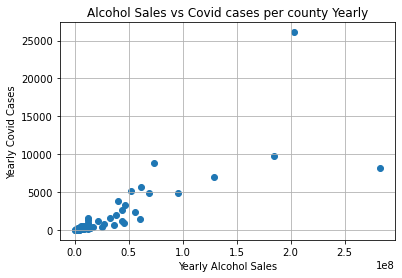

In [71]:
# scatter plot of yearly alcohol sales vs covid cases
plt.scatter(merged_covid_sales_df['Yearly Alcohol Sales'],merged_covid_sales_df['Yearly Covid Cases'], marker ='o')
plt.title('Alcohol Sales vs Covid cases per county Yearly')
plt.ylabel('Yearly Covid Cases')
plt.xlabel('Yearly Alcohol Sales')
plt.grid(True)

# Save the figure
plt.savefig("output_data/alcohol_vs_covid.png")

# Show plot
plt.show()

In [73]:
#yearly alcohol sales vs covid cases Linear Regression
x_values = merged_covid_sales_df['Yearly Alcohol Sales']
y_values = merged_covid_sales_df['Yearly Covid Cases']
correlation =round(st.pearsonr(x_values,y_values)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pvalue (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The regression line Equations is: {line_equation}")

slope:6.101263211249803e-05
intercept:-60.97457485789073
rvalue (Correlation coefficient):0.8108145933754535
pvalue (Correlation coefficient):0.81
stderr:5.462888485759092e-06
The regression line Equations is: y = 0.0x + -60.97


The r-squared is: 0.657420304830602
The regression shows a positive correlation
The higher the alcohol sales per county the higher the covid cases


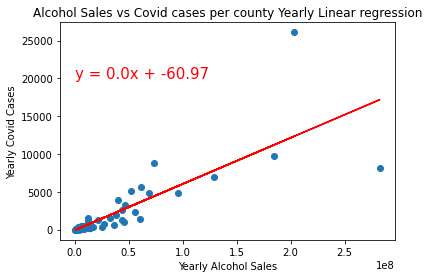

In [77]:
plt.scatter(x_values,y_values, marker ='o')
plt.plot(x_values,regress_values,"r-")
plt.title('Alcohol Sales vs Covid cases per county Yearly Linear regression')
plt.xlabel('Yearly Alcohol Sales')
plt.ylabel('Yearly Covid Cases')
plt.annotate(line_equation,(2,20000),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a positive correlation")
print("The higher the alcohol sales per county the higher the covid cases")
plt.show()

In [44]:
plt.savefig("output_data/alcohol_vs_covid_Linregress.png")

<Figure size 432x288 with 0 Axes>

In [45]:
#configuring gmaps

gmaps.configure(api_key = g_key)

In [46]:
alcohol_sales = merged_covid_sales_df['Yearly Alcohol Sales']/1000000
locations = merged_covid_sales_df[['Latitude','Longitude']]
#plotting the heatmaps
locations

,Latitude,Longitude
0,41.403413,-79.762866
1,40.419746,-76.779606
2,40.007375,-78.491165
3,40.007375,-78.491165
4,40.404153,-77.259074
...,...,...
62,40.652955,-79.093335
63,41.403413,-79.762866
64,41.403413,-79.762866
65,41.060918,-75.340836


In [69]:
# figure_layout ={
#     'width': '400px',
#     'height':'300px',
#     'border':'1px solid black',
#     'padding': '0 auto 0 auto'
# }


fig = gmaps.figure()

In [70]:
#create heat layer and marker layer
heat_layer = gmaps.heatmap_layer(locations, weights =alcohol_sales, dissipating = False, max_intensity = 100, point_radius = 1.5)

marker_locations = merged_covid_sales_df[['Latitude','Longitude']]
markers = gmaps.marker_layer(marker_locations)

fig.add_layer(heat_layer)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))